In [1]:
import sys
import numpy as np


In [2]:
from numpy import linalg

In [3]:
# define an array
A = np.arange(9) - 3


In [4]:
B = A.reshape((3,3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [6]:
# Eucliedan (L2) norm - default
print( np.linalg.norm(A))
print(np.linalg.norm(B))


8.306623862918075
8.306623862918075


In [7]:
# the Frobenius norm is the L2 norm for a matrix
# is used to measure the size of a matrix
print(np.linalg.norm(B, 'fro'))

8.306623862918075


In [8]:
# the max norm (P = infinity)
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B, np.inf))


5.0
12.0


In [9]:
# vector normalization - normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A / norm
print(A_unit)

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [10]:
#The magnitude of a unit vector is equal to 1
np.linalg.norm(A_unit)

1.0

## Eigendecomposition
Av = lambda*v

lambda: eigenvalue
v: eigenvector      

In [11]:
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[1. 2. 3.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [14]:
# The eigenvalue w[i] corresponds to the eigenvectors v[:,i]
print(eigenvalues[2])
print(eigenvectors[:,2])

3.0
[0. 0. 1.]


In [15]:
np.diag(eigenvalues)

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [16]:
np.linalg.inv(eigenvectors)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
#verify eigendecomposition
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
print(matrix)
output = np.matmul(eigenvectors, matrix).astype(int)
print(output)

[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


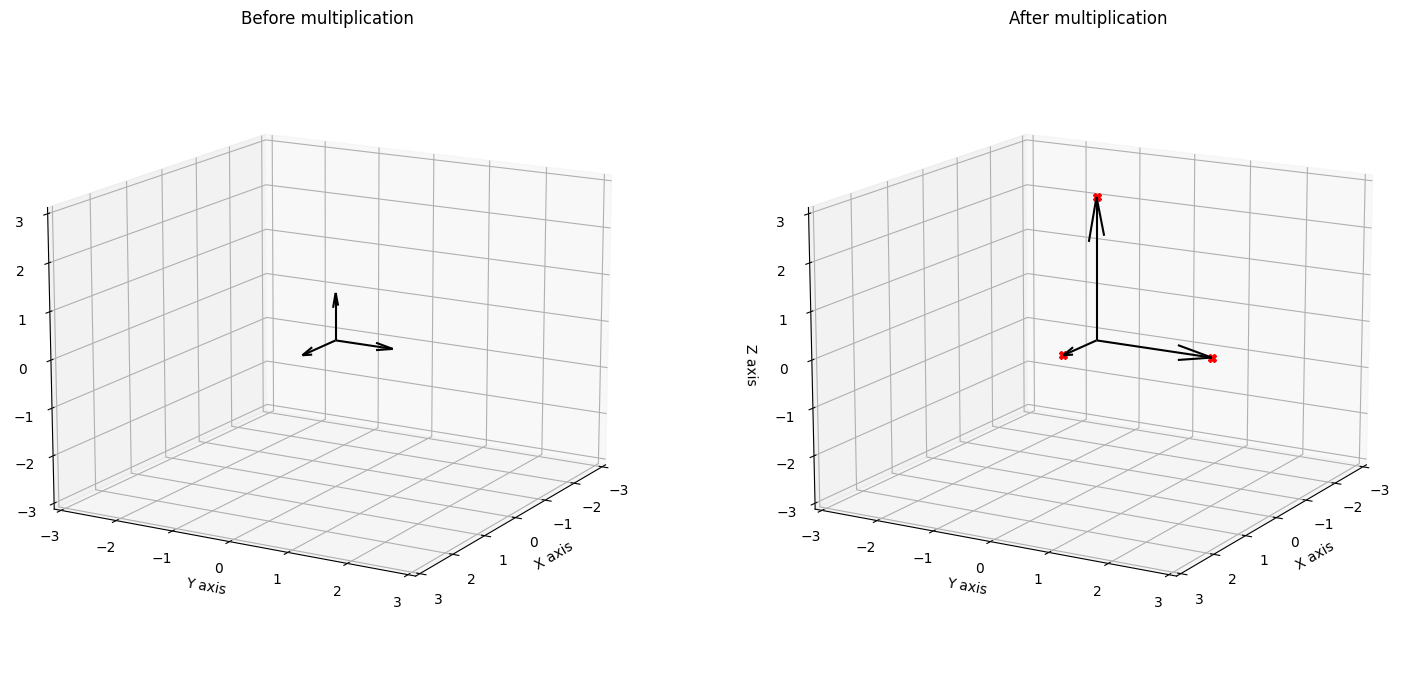

In [24]:
# plot the eigenvectors
origin = [0,0,0] #x,y,z coordinates
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(121, projection='3d') #1row 2 columns
ax1.quiver(origin, origin, origin, eigenvectors[0,:], eigenvectors[1,:], eigenvectors[2,:], color = 'k') # x,y,z
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15,30)
ax1.set_title('Before multiplication')

#multiply original matrix by eigenvectors
new_eig = np.matmul(A, eigenvectors)
ax2 = plt.subplot(122, projection='3d')
# quiver is used to plot vector
# (x0,y0,z0,x1,y1,z1)
ax2.quiver(origin, origin, origin, new_eig[0,:], new_eig[1,:], new_eig[2,:], color = 'k') # x,y,z

# add the eigenalues to the plot
ax2.plot((eigenvalues[0]*eigenvectors[0]), (eigenvalues[1]*eigenvectors[1]),(eigenvalues[2]*eigenvectors[2]), 'rX')
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_zlim([-3,3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15,30)
ax2.set_title('After multiplication')
plt.show()